# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.



---
## Step 0: Load The Data

In [1]:
import pickle

# Load pickled data
training_file = r"train.p"
validation_file= r"valid.p"
testing_file = r"test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# Number of testing examples
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import math
%matplotlib inline
# Define a function that draws the distribution of classes/labels
def draw_class_distribution(classes):
    plt.figure()
    samples_no = np.bincount(classes)
    classes_no = len(samples_no)
    plt.bar(np.arange(classes_no), samples_no )
    plt.show()
    print("Ratio between common and rare traffic signs in our sample: {0:2f}".format(round(max(samples_no)/min(samples_no)),2))

# Define a function that  draws (images_no) number of random images of each category in (y_train) out of X_train image set
def draw_random_images(X_train,y_train,images_no, labels_text):
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)
    img_rand = []
    n_classes = len(set(y_train))
    
    for label_no in range(n_classes):
        index = np.nonzero(y_train_shuffled == label_no)[0][0:images_no]
        img_rand.append(X_train_shuffled[index])
        tmp_matrix_size = (math.ceil(math.sqrt(n_classes)))
        
    for j in range(n_classes):
        print("Class: {0}, Type: {1}".format(j, labels_text[j]))
        plt.figure(figsize=(10,2))
        for i in range(images_no):
            plt.subplot(1, images_no, i+1)
            plt.imshow(img_rand[j][i])
            plt.axis('off')
        plt.show()


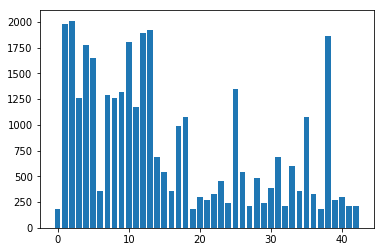

Ratio between common and rare traffic signs in our sample: 11.000000
Class: 0, Type: Speed limit (20km/h)


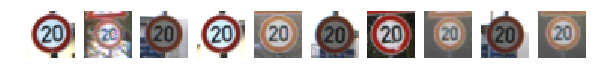

Class: 1, Type: Speed limit (30km/h)


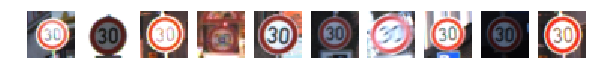

Class: 2, Type: Speed limit (50km/h)


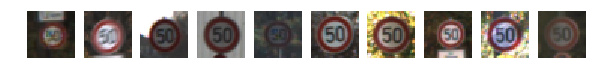

Class: 3, Type: Speed limit (60km/h)


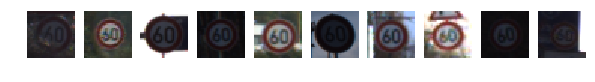

Class: 4, Type: Speed limit (70km/h)


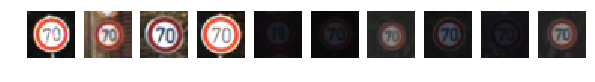

Class: 5, Type: Speed limit (80km/h)


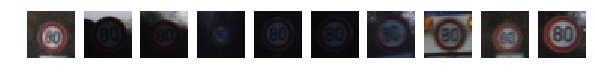

Class: 6, Type: End of speed limit (80km/h)


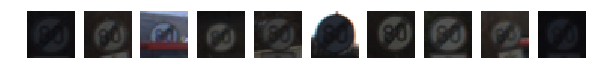

Class: 7, Type: Speed limit (100km/h)


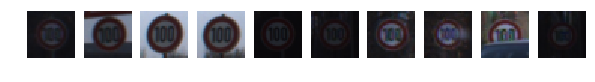

Class: 8, Type: Speed limit (120km/h)


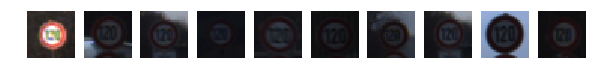

Class: 9, Type: No passing


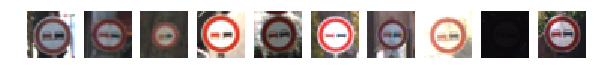

Class: 10, Type: No passing for vehicles over 3.5 metric tons


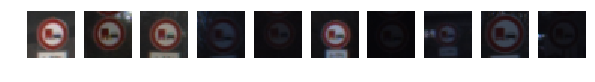

Class: 11, Type: Right-of-way at the next intersection


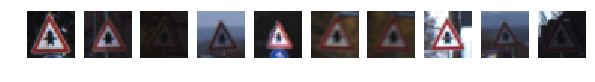

Class: 12, Type: Priority road


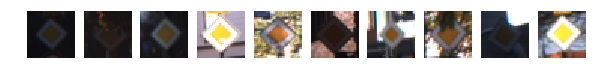

Class: 13, Type: Yield


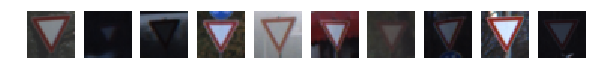

Class: 14, Type: Stop


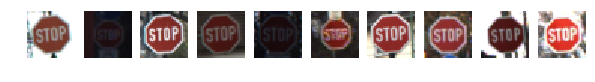

Class: 15, Type: No vehicles


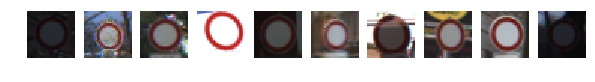

Class: 16, Type: Vehicles over 3.5 metric tons prohibited


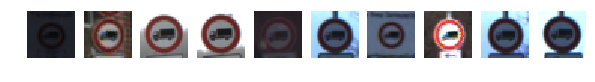

Class: 17, Type: No entry


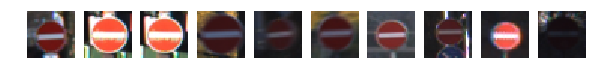

Class: 18, Type: General caution


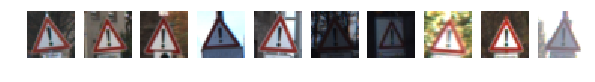

Class: 19, Type: Dangerous curve to the left


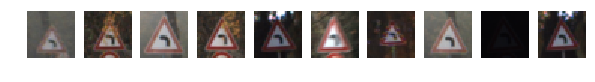

Class: 20, Type: Dangerous curve to the right


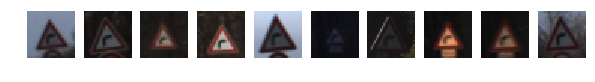

Class: 21, Type: Double curve


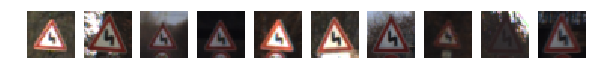

Class: 22, Type: Bumpy road


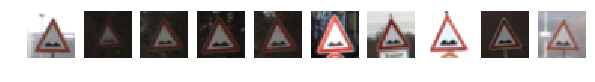

Class: 23, Type: Slippery road


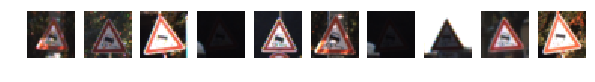

Class: 24, Type: Road narrows on the right


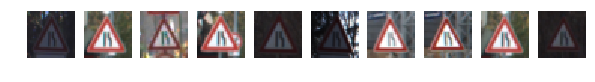

Class: 25, Type: Road work


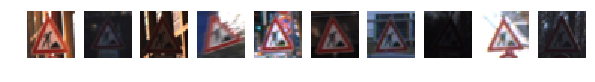

Class: 26, Type: Traffic signals


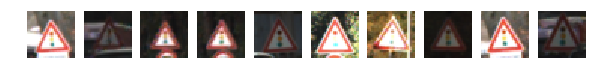

Class: 27, Type: Pedestrians


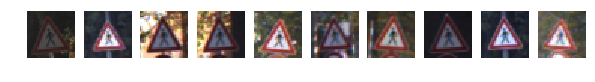

Class: 28, Type: Children crossing


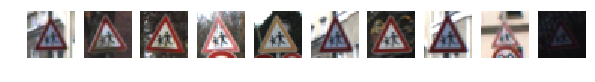

Class: 29, Type: Bicycles crossing


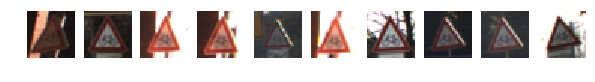

Class: 30, Type: Beware of ice/snow


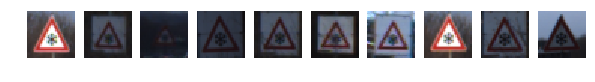

Class: 31, Type: Wild animals crossing


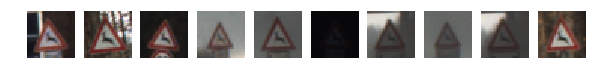

Class: 32, Type: End of all speed and passing limits


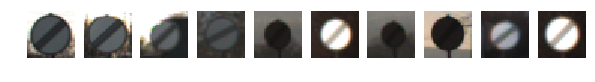

Class: 33, Type: Turn right ahead


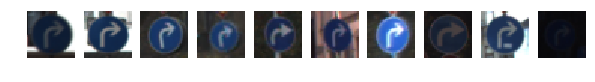

Class: 34, Type: Turn left ahead


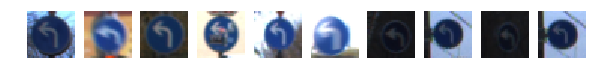

Class: 35, Type: Ahead only


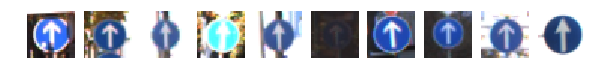

Class: 36, Type: Go straight or right


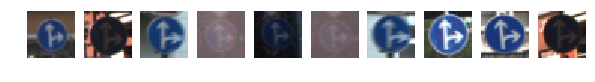

Class: 37, Type: Go straight or left


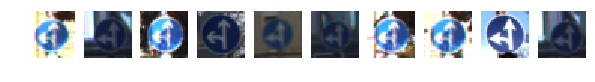

Class: 38, Type: Keep right


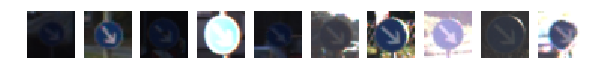

Class: 39, Type: Keep left


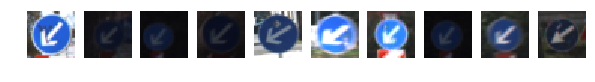

Class: 40, Type: Roundabout mandatory


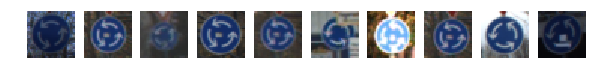

Class: 41, Type: End of no passing


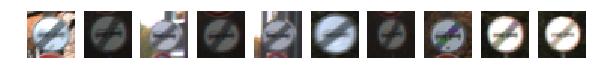

Class: 42, Type: End of no passing by vehicles over 3.5 metric tons


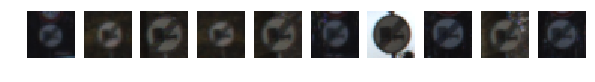

In [4]:
# Draw the distribution of classes/labels
# Read the names of the classes and display 10 images of each class/label, to elaborate the pre-processing procedures

draw_class_distribution(y_train)

signnames = pd.read_csv('signnames.csv').values[:,1]
draw_random_images(X_train, y_train, 10, signnames)

** Conclusions of the displayed images:** There is great variance between the brightness and the contrast of the traffic signs. Some photos are blurred, some signs are rotated some degrees randomly, some are displaced.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

The Pierre Sermanet and Yann LeCun paper accomplished up to 99.17% accurancy in their Traffic Sign Recognition set. Their results and suggestions are:
* MS architecture outperforms SS architecture most of the time
* Use of sophisticated non-linear modules is better than the traditional rectified sigmoid (tanh). They used a pointwised tanh, followed by a subtractive local normalization and a divisive local normalization
* Surprisingly,using no color (grayscale) is often better than using color
* They created a jittered dataset using randomly pertubed in position ([-2,2] pixels), in scale ([0.9,1.1]ratio) and rotation ([15,15] degrees).
* They suggest also affine transformations, brighness, contrast and blur.

Based on the observations from the random images of step 1, we prepare the following pre-processing functions, to test various combinations:
* Histogram Equalization
* Auto White Balance
* Grayscale
* Sharpness Filter
* Edge detection
* Set balancing through jittering

In [5]:
import cv2
import numpy as np

# The functions for image processing

# Edge detection filter
def img_edge(img):
    kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0
    output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)
    return output_3

# Image equalization filter
def img_equalize(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist (img_yuv[:,:,0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return img_output

# Image Sharpness filter
def img_sharpen1(img):
    kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img_sharp1 = cv2.filter2D(img, -1, kernel_sharpen_1)
    return img_sharp1

# Image AWB filter
def img_awb(img, perc =0.05):
    # auto white balance for every channel independently
    for channel_no in range(3):
        mi, ma = (np.percentile(img[:,:,channel_no], perc), np.percentile(img[:,:,channel_no],100.0-perc))
        img[:,:,channel_no] = np.uint8(np.clip((img[:,:,channel_no]-mi)*255.0/(ma-mi), 0, 255))
    return img

# RGB to Gray
def img_rgb2gray(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return img_gray

def img_normalize(img):
    return img/255.0

In [6]:
# The function wrappers for sets
def set_edge(dataset):
    s1,s2,s3,s4 = dataset.shape
    edge_dataset = np.zeros(dataset.shape,dtype=np.uint8)
    for i in range(s1):
        edge_dataset[i,:,:,:] = img_edge(dataset[i,:,:,:])
    return edge_dataset

def set_equalize(dataset):
    s1,s2,s3,s4 = dataset.shape
    equalized_dataset = np.zeros(dataset.shape,dtype=np.uint8)
    for i in range(s1):
        equalized_dataset[i,:,:,:] = img_equalize(dataset[i,:,:,:])
    return equalized_dataset

def set_sharpen1(dataset):
    s1,s2,s3,s4 = dataset.shape
    sharp1_dataset = np.zeros(dataset.shape,dtype=np.uint8)
    for i in range(s1):
        sharp1_dataset[i,:,:,:] = img_sharpen1(dataset[i,:,:,:])
    return sharp1_dataset

def set_awb(dataset):
    s1,s2,s3,s4 = dataset.shape
    awb_dataset = np.zeros(dataset.shape,dtype=np.uint8)
    for i in range(s1):
        awb_dataset[i,:,:,:] = img_equalize(dataset[i,:,:,:])
    return awb_dataset

def set_rgb2gray(dataset):
    s1,s2,s3,s4 = dataset.shape
    gray_dataset = np.zeros((s1,s2,s3,1),dtype=np.uint8)
    for i in range(s1):
        gray_dataset[i,:,:,0] = img_rgb2gray(dataset[i,:,:,:])
    return gray_dataset

# Simple normalization between 0-1, float numbers
def set_normalize(dataset):
    normalized_dataset = np.zeros(dataset.shape,dtype=np.float32)
    normalized_dataset = (dataset/255.0)
    return normalized_dataset

In [7]:
# This function tranforms the image: rotates, translates and scales it randomly within the given limits
def transform_img(img):
    ang_range = 30
    trans_range = 4
    scale_range = 0.1

    # Rotation & scale
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    scale = np.random.uniform(scale_range)-scale_range/2
    rows,cols,channels = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,(1-scale))
    
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    
    # run the transformations
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    return img

## BALANCE INPUT

Length of X_train before 34799
Length of y_train before 34799
Class: 0 has 180 samples. Creating 1830 samples to reach 2010 samples.
Class: 1 has 1980 samples. Creating 30 samples to reach 2010 samples.
Class: 2 has 2010 samples. Creating 0 samples to reach 2010 samples.
Class: 3 has 1260 samples. Creating 750 samples to reach 2010 samples.
Class: 4 has 1770 samples. Creating 240 samples to reach 2010 samples.
Class: 5 has 1650 samples. Creating 360 samples to reach 2010 samples.
Class: 6 has 360 samples. Creating 1650 samples to reach 2010 samples.
Class: 7 has 1290 samples. Creating 720 samples to reach 2010 samples.
Class: 8 has 1260 samples. Creating 750 samples to reach 2010 samples.
Class: 9 has 1320 samples. Creating 690 samples to reach 2010 samples.
Class: 10 has 1800 samples. Creating 210 samples to reach 2010 samples.
Class: 11 has 1170 samples. Creating 840 samples to reach 2010 samples.
Class: 12 has 1890 samples. Creating 120 samples to reach 2010 samples.
Class: 13 has 1

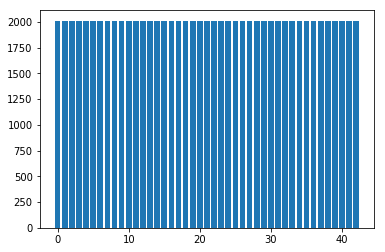

Ratio between common and rare traffic signs in our sample: 1.000000


In [8]:
# We will create new data so that all the classes/labels of the training set are balanced(same no of samples)
# A random sample is picked for each new sample and is randomly  transformed

import random
print ('Length of X_train before', len(X_train))
print ('Length of y_train before', len(y_train))

classes_unique,classes_samples_no = np.unique(y_train, return_counts = 1)

max_samples = classes_samples_no.max()
X_train_balanced = X_train
y_train_balanced = y_train

for temp_class in classes_unique:
    # Find the indexes of all the images of this class
    index_temp_class = np.nonzero(y_train==temp_class)[0]
    
    temp_missing_no = max_samples - classes_samples_no[temp_class]
    print ("Class: {0} has {1} samples. Creating {2} samples to reach {3} samples.".format(temp_class, len(index_temp_class), temp_missing_no, max_samples))
    
    # Create missing samples, with source a random image of the same type
    temp_random_source_img =random.choice(index_temp_class)
    #print("Selected randomly: ", temp_random_source_img)
    #plt.imshow(X_train[temp_random_source_img])
    #plt.show()
    
    for num in range(temp_missing_no):
        temp_transform = transform_img(X_train[temp_random_source_img])
        temp_transform = temp_transform.reshape([1,32,32,3])
        #print (y_train.shape)
        #print(temp_class)
        #print (temp_class.reshape([1]))
        X_train_balanced = np.concatenate([X_train_balanced, temp_transform])
        y_train_balanced = np.concatenate([y_train_balanced, temp_class.reshape([1])])

print ('Length of X_train after', len(X_train_balanced))
print ('Length of y_train after', len(y_train_balanced))

draw_class_distribution(y_train_balanced)

In [9]:
# Save the balanced data
import os
pickle_file = 'balanced_data.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('balanced_data.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'X_train_balanced': X_train_balanced,
                    'y_train_balanced': y_train_balanced,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Data cached in pickle file.


In [10]:
# Load the balanced data (in case we have already created them)
pickle_file = 'balanced_data.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    X_train_balanced = pickle_data['X_train_balanced']
    y_train_balanced = pickle_data['y_train_balanced']
    del pickle_data  # Free up memory

print('Data and modules loaded.')

Data and modules loaded.


In [11]:
# Preprocess pipeline

def dataset_preprocess(dataset):
    return set_normalize(set_sharpen1(dataset))
    #return set_normalize(set_sharpen1(set_awb(dataset)))
    

def dataset_preprocess_gray(dataset):
    return set_normalize(set_rgb2gray(set_awb(dataset)))
    

Image choosen randomly no: 17823, Class:10, Type:No passing for vehicles over 3.5 metric tons


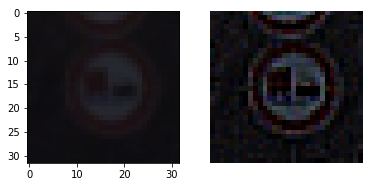

Image choosen randomly no: 13431, Class:5, Type:Speed limit (80km/h)


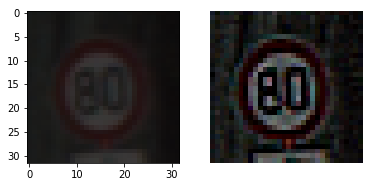

Image choosen randomly no: 25161, Class:30, Type:Beware of ice/snow


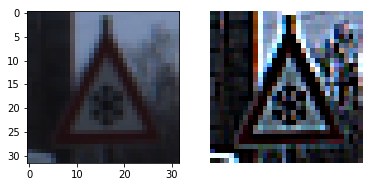

Image choosen randomly no: 25016, Class:7, Type:Speed limit (100km/h)


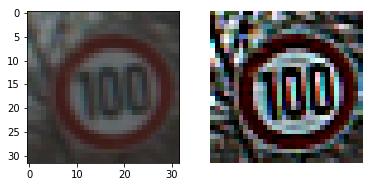

Image choosen randomly no: 17958, Class:10, Type:No passing for vehicles over 3.5 metric tons


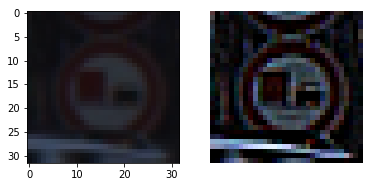

Image choosen randomly no: 33617, Class:25, Type:Road work


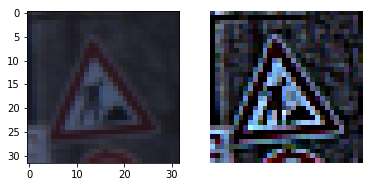

Image choosen randomly no: 11835, Class:9, Type:No passing


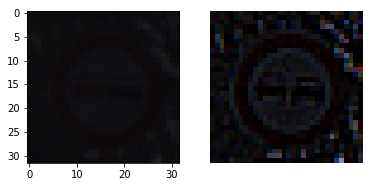

Image choosen randomly no: 21765, Class:6, Type:End of speed limit (80km/h)


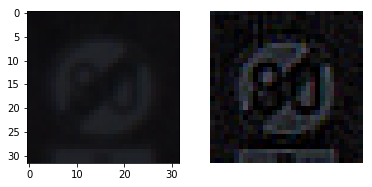

Image choosen randomly no: 18975, Class:35, Type:Ahead only


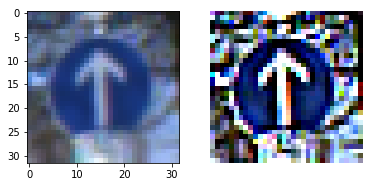

Image choosen randomly no: 24663, Class:7, Type:Speed limit (100km/h)


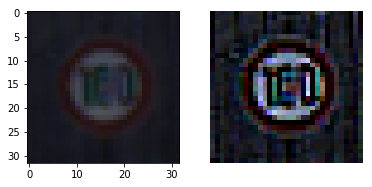

In [12]:
signnames = pd.read_csv('signnames.csv').values[:,1]

import random
for i in range(10):
    random_no = random.randint(0,len(X_train))
    random_no_class= y_train[random_no]
    print("Image choosen randomly no: {0}, Class:{1}, Type:{2}".format(random_no,random_no_class, signnames[random_no_class]))
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[random_no])
    plt.subplot(1, 2, 2)
    plt.imshow(img_sharpen1(X_train[random_no]))
    plt.axis('off')
    plt.show()



### Model Architecture

In [13]:
import tensorflow as tf

def LampNet(x, color, keep_prob1, keep_prob2):   
    mu = 0
    sigma = 0.1



    if (color): input_depth = 3
    else: input_depth = 1
    
    # Depth of Conv Layers
    if (color):
        D1 = 80
        D2 = 80
        fc1_size = 128
        fc2_size = 128
    else:
        D1 = 80
        D2 = 80
        fc1_size = 100
        fc2_size = 100
        

    #Conv Layer 1: Convolutional. Input = 32x32x1 or 32x32x3. Output = 28x28xD1:
    with tf.name_scope("CONV1"):
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_depth, D1), mean=mu, stddev=sigma))
        conv1_b = tf.Variable(tf.zeros(D1))
        conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer1: Activation.
    with tf.name_scope("RELU1"):
        conv1 = tf.nn.relu(conv1)

    #Layer 1: Pooling. Input = 28x28xD1. Output = 14x14xD1.
    with tf.name_scope("POOL1"):
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        #conv1 = tf.nn.dropout(conv1, 0.5)
    #Layer 2: Convolutional. Output = 10x10xD2.
    with tf.name_scope("CONV2"):
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, D1, D2), mean=mu, stddev=sigma))
        conv2_b = tf.Variable(tf.zeros(D2))
        conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Layer2: Activation.
    with tf.name_scope("RELU2"):
        conv2 = tf.nn.relu(conv2)

    # Layer2: Pooling. Input = 10x10xD2. Output = 5x5xD2
    with tf.name_scope("POOL2"):
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer1b: 2nd pooling of 1st layer to feed in flattened input. Input = 14x14xD1, Output = 7x7xD1
        with tf.name_scope("POOL1b"):
            conv1b = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # SOLUTION: Flatten. Input = . Output = 5920
    flat1b =tf.reshape(conv1b,[-1,7*7*D1])
    flat2 = tf.reshape(conv2,[-1,5*5*D2])
    with tf.name_scope("Flatten"):
        flatten = tf.concat([flat1b, flat2],1)
  
    # SOLUTION: Layer 3: Fully Connected. Input = 7*7*D1+5*5*D2. Output = fc1_size.
    with tf.name_scope("FC1"):
        fc1_W = tf.Variable(tf.truncated_normal(shape=(7*7*D1+5*5*D2, fc1_size), mean=mu, stddev=sigma))
        fc1_b = tf.Variable(tf.zeros(fc1_size))
        fc1 = tf.matmul(flatten, fc1_W) + fc1_b

    # SOLUTION: Activation.
    with tf.name_scope("RELU3"):
        fc1 = tf.nn.relu(fc1)


    with tf.name_scope("DROP_OUT_1"):
        #fc1 = tf.nn.dropout(fc1, keep_prob1)
        fc1 = tf.nn.dropout(fc1, keep_prob1)
    # SOLUTION: Layer 4: Fully Connected. Input = fc1_size. Output = fc2_size.
    with tf.name_scope("FC2"):
        fc2_W = tf.Variable(tf.truncated_normal(shape=(fc1_size,fc2_size), mean=mu, stddev=sigma))
        fc2_b = tf.Variable(tf.zeros(fc2_size))
        fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    with tf.name_scope("RELU4"):
        fc2 = tf.nn.relu(fc2)
        
    with tf.name_scope("DROP_OUT_2"):
        #fc2 = tf.nn.dropout(fc2, keep_prob2)
        fc2 = tf.nn.dropout(fc2, keep_prob2)
    # SOLUTION: Layer 5: Fully Connected. Input = fc2_size. Output = 43
    with tf.name_scope("FC3"):
        fc3_W = tf.Variable(tf.truncated_normal(shape=(fc2_size, 43), mean=mu, stddev=sigma))
        fc3_b = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
from sklearn.utils import shuffle
import time

    

# Set Running parameters
color = 1 # color or B/W training mode
balanced = 0 # Use balanced set or not
EPOCHS = 200
train_keep1 = 0.75
train_keep2 = 0.8
BATCH_SIZE = 128
rate = 0.001

# SET input_depth according to color
if (color): input_depth = 3
else: input_depth = 1
    

# Prepare tensors
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
#training_phase = tf.placeholder(tf.bool)
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)

#logits = LampNet(x,color, training_phase)
logits = LampNet (x, color, keep_prob1, keep_prob2)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate, epsilon=0.1)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
save_file = './LampNet.ckpt'


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, training_phase: False})
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1:1, keep_prob2:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

merged = tf.summary.merge_all()


# Choose dataset for training

if (balanced):
    X_train_data = X_train_balanced
    y_train_data = y_train_balanced
else:
    X_train_data = X_train
    y_train_data = y_train


# Pass the rest of the data
X_valid_data = X_valid
y_valid_data = y_valid
X_test_data = X_test
y_test_data = y_test


# Pre-process data for training


if (color):
    X_train_data = dataset_preprocess(X_train_data)
    #y_train_data = y_train_data
    X_valid_data = dataset_preprocess(X_valid_data)
    #y_valid_data = y_valid
    X_test_data = dataset_preprocess(X_test_data)
    #y_test_data = y_test
else:
    X_train_data = dataset_preprocess_gray(X_train_data)
    X_valid_data = dataset_preprocess_gray(X_valid_data)
    X_test_data = dataset_preprocess_gray(X_test_data)

print("Input size ",X_train_data.shape)

X_train_data, y_train_data = shuffle(X_train_data, y_train_data)

with tf.Session() as sess:

    # Create a filewriter, to be able to see graphs with Tensorboard
    #file_writer = tf.summary.FileWriter('./logs', graph=tf.get_default_graph())

    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_data)
    

    print("Training...")
    print()
    start_time = time.time()
    for i in range(EPOCHS):
        epoch_start_time = time.time()
        total_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_data[offset:end], y_train_data[offset:end]
            #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, training_phase: True})
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1:train_keep1, keep_prob2:train_keep2})
            
        training_accuracy = evaluate(X_train_data, y_train_data)
        validation_accuracy = evaluate(X_valid_data, y_valid_data)
        epoch_end_time = time.time()
        print("EPOCH {} ..., trainingtime {:.2f} sec, Training Accuracy= {:.3f},  Validation Accuracy = {:.3f}, Difference: {:.3f})".format(i+1,(epoch_end_time-epoch_start_time), training_accuracy,validation_accuracy, training_accuracy-validation_accuracy))
    end_time = time.time()
    print("Total Time:",(end_time-start_time))
    saver.save(sess, save_file)
    print("Model saved")

Input size  (34799, 32, 32, 3)
Training...

EPOCH 1 ..., trainingtime 8.12 sec, Training Accuracy= 0.281,  Validation Accuracy = 0.241, Difference: 0.040)
EPOCH 2 ..., trainingtime 7.17 sec, Training Accuracy= 0.437,  Validation Accuracy = 0.389, Difference: 0.048)
EPOCH 3 ..., trainingtime 7.29 sec, Training Accuracy= 0.556,  Validation Accuracy = 0.485, Difference: 0.071)
EPOCH 4 ..., trainingtime 7.19 sec, Training Accuracy= 0.656,  Validation Accuracy = 0.575, Difference: 0.080)
EPOCH 5 ..., trainingtime 7.27 sec, Training Accuracy= 0.737,  Validation Accuracy = 0.651, Difference: 0.087)
EPOCH 6 ..., trainingtime 7.15 sec, Training Accuracy= 0.796,  Validation Accuracy = 0.711, Difference: 0.085)
EPOCH 7 ..., trainingtime 7.28 sec, Training Accuracy= 0.835,  Validation Accuracy = 0.743, Difference: 0.092)
EPOCH 8 ..., trainingtime 7.21 sec, Training Accuracy= 0.872,  Validation Accuracy = 0.783, Difference: 0.089)
EPOCH 9 ..., trainingtime 7.15 sec, Training Accuracy= 0.895,  Valid

In [15]:
#X_test_data = X_test
#y_test_data = y_test
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_data, y_test_data)

print("Test Accuracy= {:.3f}".format(test_accuracy))


Test Accuracy= 0.954


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.


### Load and Output the Images

In [16]:
import os
# Load all images in New_samples folder and resize them to 32x32. Export them to same dataset strcture

def load_images_from_folder(folder):
    X_samples = np.empty([0, 32, 32, 3], dtype = np.uint8)
    dim = (32,32)
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = img[...,::-1]
            img = cv2.resize(img, dim,interpolation=cv2.INTER_AREA)
            X_samples = np.append(X_samples, [img[:, :, :3]], axis = 0)
    return X_samples

X_samples = load_images_from_folder("New_samples")

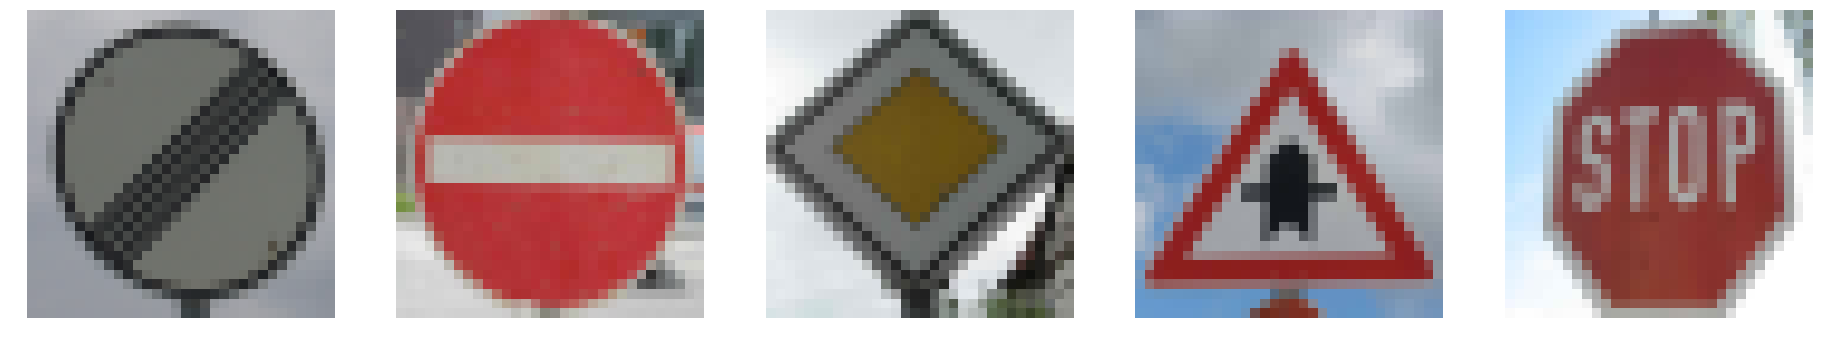

In [17]:
f, axes = plt.subplots(nrows=1, ncols=len(X_samples), figsize=(32, 32))

for i, img in enumerate(X_samples):
    axes[i].imshow(img)
    axes[i].axis('off')


### Above are 5 images 

In [18]:
if 'signnames' not in globals():
    signnames = pd.read_csv('signnames.csv').values[:,1]

for i, name in enumerate(signnames):
    print ("Class: {} is :{}".format(i,name))


Class: 0 is :Speed limit (20km/h)
Class: 1 is :Speed limit (30km/h)
Class: 2 is :Speed limit (50km/h)
Class: 3 is :Speed limit (60km/h)
Class: 4 is :Speed limit (70km/h)
Class: 5 is :Speed limit (80km/h)
Class: 6 is :End of speed limit (80km/h)
Class: 7 is :Speed limit (100km/h)
Class: 8 is :Speed limit (120km/h)
Class: 9 is :No passing
Class: 10 is :No passing for vehicles over 3.5 metric tons
Class: 11 is :Right-of-way at the next intersection
Class: 12 is :Priority road
Class: 13 is :Yield
Class: 14 is :Stop
Class: 15 is :No vehicles
Class: 16 is :Vehicles over 3.5 metric tons prohibited
Class: 17 is :No entry
Class: 18 is :General caution
Class: 19 is :Dangerous curve to the left
Class: 20 is :Dangerous curve to the right
Class: 21 is :Double curve
Class: 22 is :Bumpy road
Class: 23 is :Slippery road
Class: 24 is :Road narrows on the right
Class: 25 is :Road work
Class: 26 is :Traffic signals
Class: 27 is :Pedestrians
Class: 28 is :Children crossing
Class: 29 is :Bicycles crossing


### We set manually the real types of traffic signs in the list y_samples below

In [19]:
if (color):
    X_samples_data = dataset_preprocess(X_samples)
    y_samples_data = (32,17,12,11,14)
else:
    X_samples_data = dataset_preprocess_gray(X_samples)
    y_samples_data = (32,17,12,11,14)


### Predict the Sign Type for Each Image

In [20]:
# Preprocess the sample set
X_samples_test = set_normalize(set_sharpen1(X_samples))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    predict_logits = tf.argmax(logits, 1)
    samples_prediction = sess.run(predict_logits, feed_dict={x: X_samples_data, keep_prob1:1, keep_prob2:1})

for i, label in enumerate (samples_prediction): 
    print ("--------------Sample No: {}---------------------------------------------------".format(i+1))
    print (" Predicted  : {}, {}".format(label, signnames[label]))
    print (" Normally is: {}, {}".format(y_samples_data[i],signnames[y_samples_data[i]]))






--------------Sample No: 1---------------------------------------------------
 Predicted  : 32, End of all speed and passing limits
 Normally is: 32, End of all speed and passing limits
--------------Sample No: 2---------------------------------------------------
 Predicted  : 17, No entry
 Normally is: 17, No entry
--------------Sample No: 3---------------------------------------------------
 Predicted  : 12, Priority road
 Normally is: 12, Priority road
--------------Sample No: 4---------------------------------------------------
 Predicted  : 11, Right-of-way at the next intersection
 Normally is: 11, Right-of-way at the next intersection
--------------Sample No: 5---------------------------------------------------
 Predicted  : 14, Stop
 Normally is: 14, Stop


### Analyze Performance

In [21]:
samples_performance = 0

for i, label in enumerate (samples_prediction):
    if (label==y_samples_data[i]):
        samples_performance+=1
samples_performance /=len(samples_prediction)

print("The performance in the sample images is :{0:.2f}%".format(samples_performance*100))

The performance in the sample images is :100.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
top_k_no = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    # model evaluation
    predict_softmax = tf.nn.softmax(logits)
    top_k_results = sess.run(tf.nn.top_k(predict_softmax,k=top_k_no),feed_dict={x: X_samples_data ,keep_prob1:1, keep_prob2:1})
    samples_prob, samples_indices = top_k_results
    np.set_printoptions(precision=3, suppress=True)
    print(samples_prob)

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]


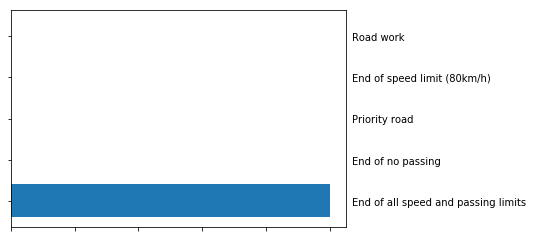

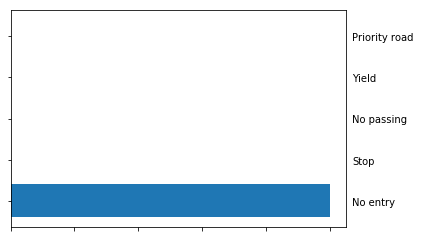

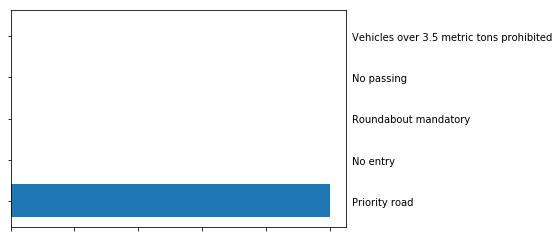

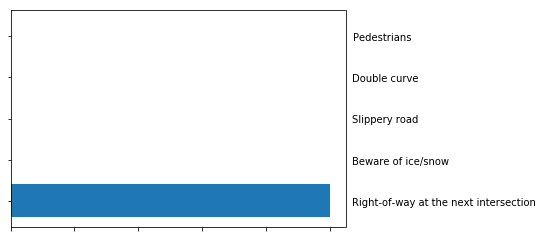

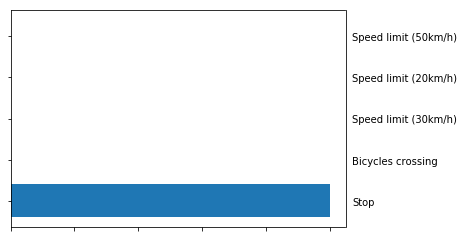

In [24]:
for i in range(5):
    plt.barh(np.arange(5)+.5, top_k_results[0][i], align='center')
    plt.yticks(np.arange(5)+.5, signnames[top_k_results[1][i].astype(int)])
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    plt.show()


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
%matplotlib inline

sample_input = X_test[300]

with tf.Session() as sess:
    saver.restore(sess, state_file_best)
    outputFeatureMap([sample_input], tf.get_default_graph().get_tensor_by_name(
        "{}/conv_1/add:0".format(namespace)), sess)
    plt.show()
    outputFeatureMap([sample_input], tf.get_default_graph().get_tensor_by_name(
        "{}/conv_2/add:0".format(namespace)), sess)
    plt.show()


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 